In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
from matplotlib import style
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
df1 = pd.read_csv("C:\\Users\\dell\\OneDrive\\Documents\\datasets\\Dataset 1.csv")
df2 = pd.read_csv("C:\\Users\\dell\\OneDrive\\Documents\\datasets\\Dataset 2.csv")
df3 = pd.read_csv("C:\\Users\\dell\\OneDrive\\Documents\\datasets\\Dataset 3.csv")
df4 = pd.read_csv("C:\\Users\\dell\\OneDrive\\Documents\\datasets\\Dataset 4.csv")

In [3]:
df1.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,52.50,270,191,786,445.0,4.588516,6,6,6,47331,56965.0,1594168229367522,1594168228968772,2115.305700,malicious,0.398750
1,50.25,270,191,786,445.0,4.588516,6,6,6,47331,57217.0,1594168231492958,1594168231104076,2115.305700,malicious,0.388882
2,50.00,270,191,786,445.0,4.588516,6,6,6,47331,57294.0,1594168232099461,1594168231710708,2115.305700,malicious,0.388753
3,0.00,56,56,786,NaN,1.020244,1,1,1,55960,NaN,1594168231421839,159416823142178,114.267365,outlier,0.000059
4,53.75,270,191,786,445.0,4.588516,6,6,6,47331,57325.0,1594168232419566,1594168232008625,2115.305700,malicious,0.410941


In [4]:
df2.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,2716.142857,969,10051,786,9200,3.093910,7,7,6,786,56328,160946769170627,1609467672690358,34094.88700,benign,19.015911
1,1901.400000,967,23531,786,9200,1.642038,10,7,6,786,56324,1609467691706011,1609467672689065,40226.65200,benign,19.016947
2,907.312500,754,32742,786,9092,1.111004,32,20,6,786,57148,1609467701725488,1609467672683006,37214.20000,benign,29.042482
3,549.842105,588,13833,786,9300,2.344926,57,34,6,786,56998,1609467713462009,1609467682094405,33816.18400,benign,31.367603
4,4288.714286,0,224,15169,53,3.326140,7,0,17,786,46151,1609467715620521,1609467685597113,745.05536,benign,30.023409


In [5]:
df3.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,0.0,0,0,786,31306.0,0.0,1,0,6,786,47613.0,1655074782132491,1655074782132491,0.0,outlier,0.0
1,0.0,0,0,786,24298.0,0.0,1,0,6,786,47613.0,1655074782573321,1655074782573321,0.0,outlier,0.0
2,0.0,0,0,786,31789.0,0.0,1,0,6,786,47613.0,1655074783148517,1655074783148517,0.0,outlier,0.0
3,0.0,0,0,786,29409.0,0.0,1,0,6,786,47613.0,1655074783149855,1655074783149855,0.0,outlier,0.0
4,0.0,0,0,786,60965.0,0.0,1,0,6,786,47613.0,1655074783167254,1655074783167254,0.0,outlier,0.0


In [6]:
df4.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,208.00,0,132,786,445.0,0.323657,3,2,6,786,50285.0,1613091025587726,161309102537934,42.722755,outlier,0.208386
1,174.75,270,191,786,445.0,4.547564,6,6,6,786,50206.0,1613091025801601,1613091024573787,2096.427000,malicious,1.227814
2,26.80,1447,1312,786,22.0,6.920547,14,17,6,786,38826.0,161309102627185,1613091025844682,19093.791000,malicious,0.427168
3,145.00,12,12,786,5900.0,2.886842,5,5,6,786,39020.0,1613091086230683,1613091085759512,69.284210,malicious,0.471171
4,215.75,270,191,786,445.0,4.547564,6,6,6,786,56656.0,1613091087274613,1613091085883002,2096.427000,malicious,1.391611


In [7]:
df_dataset=pd.concat([df1,df2,df3,df4])

In [8]:
df_dataset.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,52.50,270,191,786,445.0,4.588516,6,6,6,47331,56965.0,1594168229367522,1594168228968772,2115.305700,malicious,0.398750
1,50.25,270,191,786,445.0,4.588516,6,6,6,47331,57217.0,1594168231492958,1594168231104076,2115.305700,malicious,0.388882
2,50.00,270,191,786,445.0,4.588516,6,6,6,47331,57294.0,1594168232099461,1594168231710708,2115.305700,malicious,0.388753
3,0.00,56,56,786,NaN,1.020244,1,1,1,55960,NaN,1594168231421839,159416823142178,114.267365,outlier,0.000059
4,53.75,270,191,786,445.0,4.588516,6,6,6,47331,57325.0,1594168232419566,1594168232008625,2115.305700,malicious,0.410941


In [9]:
df1.shape

(112755, 16)

In [10]:
df2.shape

(43778, 16)

In [11]:
df3.shape

(26167, 16)

In [12]:
df4.shape

(872367, 16)

In [13]:
df_dataset.shape

(1055067, 16)

In [14]:
df_dataset

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,52.50,270,191,786,445.0,4.588516,6,6,6,47331,56965.0,1594168229367522,1594168228968772,2115.305700,malicious,0.398750
1,50.25,270,191,786,445.0,4.588516,6,6,6,47331,57217.0,1594168231492958,1594168231104076,2115.305700,malicious,0.388882
2,50.00,270,191,786,445.0,4.588516,6,6,6,47331,57294.0,1594168232099461,1594168231710708,2115.305700,malicious,0.388753
3,0.00,56,56,786,NaN,1.020244,1,1,1,55960,NaN,1594168231421839,159416823142178,114.267365,outlier,0.000059
4,53.75,270,191,786,445.0,4.588516,6,6,6,47331,57325.0,1594168232419566,1594168232008625,2115.305700,malicious,0.410941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872362,477.00,1359,745,786,22.0,6.921222,13,13,6,786,39162.0,1613173407903601,1613173402404684,14562.251000,malicious,5.498917
872363,99.75,270,191,786,445.0,4.559551,6,6,6,786,58597.0,1613173408034155,1613173407253156,2101.953100,outlier,0.780999
872364,116.50,270,191,786,445.0,4.569075,6,6,6,786,57689.0,1613173408408002,1613173407492927,2106.343500,malicious,0.915075
872365,101.50,270,191,786,445.0,4.559551,6,6,6,786,58479.0,1613173406848608,1613173406060193,2101.953100,outlier,0.788415


In [15]:
df_dataset.info

<bound method DataFrame.info of         avg_ipt  bytes_in  bytes_out  dest_ip  dest_port   entropy  \
0         52.50       270        191      786      445.0  4.588516   
1         50.25       270        191      786      445.0  4.588516   
2         50.00       270        191      786      445.0  4.588516   
3          0.00        56         56      786        NaN  1.020244   
4         53.75       270        191      786      445.0  4.588516   
...         ...       ...        ...      ...        ...       ...   
872362   477.00      1359        745      786       22.0  6.921222   
872363    99.75       270        191      786      445.0  4.559551   
872364   116.50       270        191      786      445.0  4.569075   
872365   101.50       270        191      786      445.0  4.559551   
872366    99.50       270        191      786      445.0  4.559551   

        num_pkts_out  num_pkts_in  proto  src_ip  src_port          time_end  \
0                  6            6      6   4733

In [16]:
df_dataset.isnull().sum()

avg_ipt              0
bytes_in             0
bytes_out            0
dest_ip              0
dest_port        22596
entropy              0
num_pkts_out         0
num_pkts_in          0
proto                0
src_ip               0
src_port         22596
time_end             0
time_start           0
total_entropy        0
label                0
duration             0
dtype: int64

In [17]:
df_dataset.describe()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration
count,1.055067e+06,1.055067e+06,1.055067e+06,1.055067e+06,1.032471e+06,1.055067e+06,1.055067e+06,1.055067e+06,1.055067e+06,1.055067e+06,1.032471e+06,1.055067e+06,1.055067e+06,1.055067e+06,1.055067e+06
mean,2.463721e+06,9.267478e+02,3.232239e+03,1.170804e+03,1.201671e+04,3.121516e+00,6.790462e+00,4.302001e+00,6.096138e+00,2.505211e+03,3.837745e+04,1.465505e+15,1.465705e+15,1.587961e+04,1.725400e+00
std,6.079653e+07,5.350950e+03,7.324738e+03,2.835862e+03,1.537039e+04,2.569820e+00,2.005894e+01,1.523080e+01,1.678128e+00,1.331851e+04,1.846428e+04,4.398343e+14,4.395759e+14,1.089548e+05,1.463885e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.740000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.609487e+10,1.613101e+10,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,7.860000e+02,4.450000e+02,0.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,7.860000e+02,3.444400e+04,1.613094e+15,1.613094e+15,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.910000e+02,7.860000e+02,9.200000e+03,3.602738e+00,3.000000e+00,1.000000e+00,6.000000e+00,7.860000e+02,3.917600e+04,1.613106e+15,1.613106e+15,2.103056e+03,2.550000e-04
75%,4.600000e+01,2.700000e+02,2.896000e+03,7.860000e+02,9.200000e+03,4.623700e+00,6.000000e+00,5.000000e+00,6.000000e+00,7.860000e+02,5.328800e+04,1.613110e+15,1.613110e+15,1.996572e+04,3.681265e-01
max,4.294967e+09,6.548500e+04,6.553300e+04,2.133710e+05,6.553400e+04,1.077386e+02,2.550000e+02,2.550000e+02,5.800000e+01,3.976510e+05,6.553400e+04,1.655078e+15,1.655078e+15,3.489045e+06,9.743361e+03


In [18]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055067 entries, 0 to 872366
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   avg_ipt        1055067 non-null  float64
 1   bytes_in       1055067 non-null  int64  
 2   bytes_out      1055067 non-null  int64  
 3   dest_ip        1055067 non-null  int64  
 4   dest_port      1032471 non-null  float64
 5   entropy        1055067 non-null  float64
 6   num_pkts_out   1055067 non-null  int64  
 7   num_pkts_in    1055067 non-null  int64  
 8   proto          1055067 non-null  int64  
 9   src_ip         1055067 non-null  int64  
 10  src_port       1032471 non-null  float64
 11  time_end       1055067 non-null  int64  
 12  time_start     1055067 non-null  int64  
 13  total_entropy  1055067 non-null  float64
 14  label          1055067 non-null  object 
 15  duration       1055067 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 136.8+

In [19]:
df_dataset = df_dataset.drop(['time_start', 'time_end'], axis=1)

In [20]:
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [21]:
df_dataset.dropna(inplace=True)

In [22]:
print(df_dataset.duplicated().sum())

152356


In [23]:
df_dataset.drop_duplicates(inplace = True)

In [24]:
print(df_dataset.duplicated().sum())

0


In [25]:
#implementation of binary classifier
df_dataset["label"].value_counts()

benign       457062
malicious    252937
outlier      170116
Name: label, dtype: int64

In [26]:
old_value = 'outlier'
new_value = 'malicious'
df_dataset['label'] = df_dataset['label'].replace(old_value, new_value)

In [27]:
old_value = 'malicious'
new_value = 1
df_dataset['label'] = df_dataset['label'].replace(old_value, new_value)

In [30]:
old_value = 'benign'
new_value = 0
df_dataset['label'] = df_dataset['label'].replace(old_value, new_value)

In [31]:
df_dataset["label"].value_counts()


0    457062
1    423053
Name: label, dtype: int64

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight

RANDOM_STATE_SEED = 12

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df = df_dataset
fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df["label"].value_counts().values[0:1],
           x=['Benign'],
           text = df["label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df["label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df["label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)


In [33]:
df1 = df[df["label"] == 0][: 300000]
df2 = df[df["label"] == 1][: 300000]
df_equal = pd.concat([ df1,df2], axis =0)

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df_equal["label"].value_counts().values[0:1],
           x=['Benign'],
           text = df_equal["label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df_equal["label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df_equal["label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [35]:
train, test = train_test_split(df_equal, test_size=0.2)
# display columns
train.columns

Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'total_entropy', 'label', 'duration'],
      dtype='object')

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480000 entries, 644999 to 81409
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        480000 non-null  float64
 1   bytes_in       480000 non-null  int64  
 2   bytes_out      480000 non-null  int64  
 3   dest_ip        480000 non-null  int64  
 4   dest_port      480000 non-null  float64
 5   entropy        480000 non-null  float64
 6   num_pkts_out   480000 non-null  int64  
 7   num_pkts_in    480000 non-null  int64  
 8   proto          480000 non-null  int64  
 9   src_ip         480000 non-null  int64  
 10  src_port       480000 non-null  float64
 11  total_entropy  480000 non-null  float64
 12  label          480000 non-null  int64  
 13  duration       480000 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 54.9 MB


In [37]:
train

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,total_entropy,label,duration
644999,879.000000,270,191,786,445.0,4.561944,7,9,6,786,21070.0,2103.05640,1,3.884374
306341,0.000000,0,14480,786,9200.0,1.833521,10,0,6,786,40304.0,26549.38000,0,0.000125
7837,0.000000,0,0,786,60880.0,0.000000,1,0,6,49453,43221.0,0.00000,1,0.000000
158087,0.000000,0,419,786,39174.0,7.154624,2,0,6,786,9200.0,2997.78740,0,0.015633
283377,0.000000,0,0,786,445.0,0.000000,1,0,6,786,50226.0,0.00000,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656502,0.000000,0,0,786,445.0,0.000000,1,1,6,786,55257.0,0.00000,1,0.000955
70052,9.500000,343,8194,786,9200.0,3.148263,4,2,6,786,57678.0,26876.72500,0,0.038953
32489,4289.142857,0,224,15169,53.0,3.326140,7,0,17,786,59099.0,745.05536,0,30.025380
661345,143.500000,12,12,786,5900.0,2.886842,5,5,6,786,58120.0,69.28421,1,0.432022


In [38]:
test

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,total_entropy,label,duration
31442,493.793651,651,15264,786,9300.0,2.187267,63,33,6,786,56998.0,34810.3600,0,31.140226
292846,0.000000,0,2896,786,9200.0,4.881753,2,0,6,786,40304.0,14137.5580,0,0.000004
98018,0.086957,59759,12254,786,9300.0,1.028153,34,15,6,786,49108.0,74040.3700,0,0.004075
248202,0.000000,0,13032,786,9200.0,2.071618,9,1,6,786,42436.0,26997.3200,0,0.000321
113052,51.666667,89,191,786,445.0,4.100381,4,3,6,786,58415.0,1148.1067,1,0.156483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609666,6.000000,181,140,786,445.0,4.615119,1,2,6,786,56167.0,1481.4530,1,0.012574
18838,128.250000,270,191,786,445.0,4.580686,6,6,6,7552,61689.0,2111.6960,1,1.014573
284973,0.000000,0,10136,786,9200.0,2.514711,7,0,6,786,39166.0,25489.1070,0,0.000077
671206,42.500000,270,191,786,445.0,4.564953,6,6,6,786,57177.0,2104.4434,1,0.307244


In [39]:
print("Full dataset:\n")
print("Benign: " + str(df_equal["label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_equal["label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 300000
Malicious: 300000
---------------
Training set:

Benign: 240193
Malicious: 239807
---------------
Test set:

Benign: 59807
Malicious: 60193


In [40]:
y_train = np.array(train.pop("label"))# pop removes "Label" from the dataframe
X_train = train.values

In [41]:
y_test = np.array(test.pop("label")) # pop removes "Label" from the dataframe
X_test = test.values

In [39]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.8f}%".format(rforest_acc*100))

Test accuracy: 99.98916667%


In [40]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59867
           1       1.00      1.00      1.00     60133

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000



TN:  59863
FN:  9
TP:  60124
FP:  4


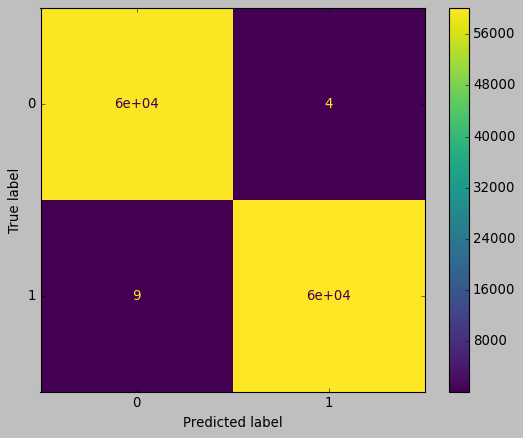

In [41]:

style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [50]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.8f}%".format(dtree_acc*100))

Test accuracy: 99.98000000%


In [51]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59867
           1       1.00      1.00      1.00     60133

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000



TN:  59852
FN:  9
TP:  60124
FP:  15


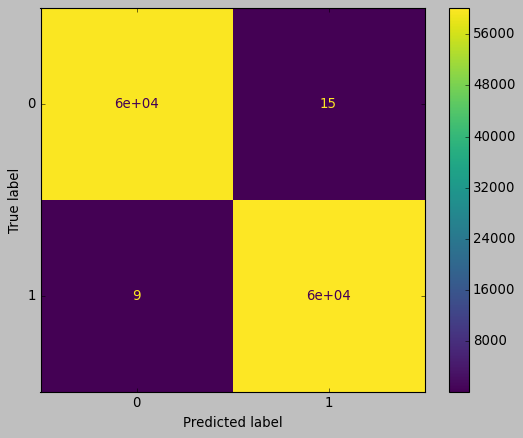

In [52]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)    
predicted = knn.predict(X_test)

In [54]:
knn_acc = accuracy_score(predicted, y_test)
print("Test accuracy: {:.8f}%".format(knn_acc*100))

Test accuracy: 99.93083333%


TN:  59860
FN:  76
TP:  60057
FP:  7


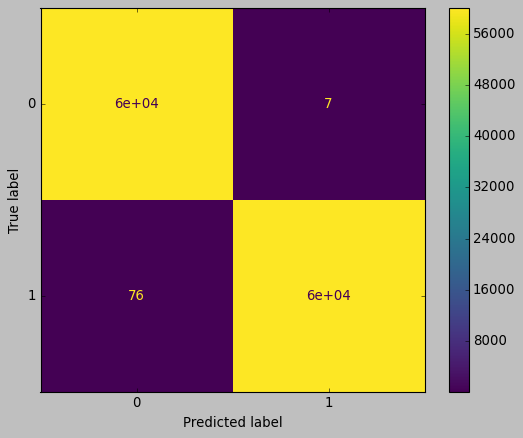

In [55]:
style.use('classic')
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [44]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_train_accuracy=lr.score(X_train,y_train)
lr_test_accuracy=lr.score(X_test,y_test)
print("Accuracy of train dataset: {:.4f}%".format(lr_train_accuracy*100))
print("Accuracy of test dataset: {:.4f}%".format(lr_test_accuracy*100))

Accuracy of train dataset: 91.6227%
Accuracy of test dataset: 91.6683%


In [45]:
lr_pred = lr.predict(X_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     59807
           1       0.91      0.93      0.92     60193

    accuracy                           0.92    120000
   macro avg       0.92      0.92      0.92    120000
weighted avg       0.92      0.92      0.92    120000



TN:  53977
FN:  4168
TP:  56025
FP:  5830


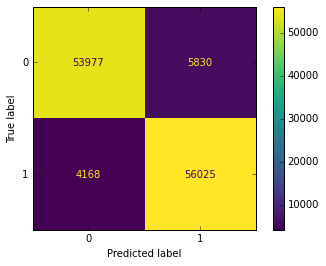

In [48]:
style.use('classic')
cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [50]:
import tensorflow as tf

In [51]:
ann = tf.keras.models.Sequential()

In [52]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [53]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [54]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [55]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [57]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
15000/15000 [==============================] - 43s 3ms/step - loss: 480.4532 - accuracy: 0.8529
Epoch 2/100
15000/15000 [==============================] - 43s 3ms/step - loss: 0.2720 - accuracy: 0.9049
Epoch 3/100
15000/15000 [==============================] - 45s 3ms/step - loss: 0.2386 - accuracy: 0.9204
Epoch 4/100
15000/15000 [==============================] - 44s 3ms/step - loss: 1.5349 - accuracy: 0.9231
Epoch 5/100
15000/15000 [==============================] - 43s 3ms/step - loss: 0.1610 - accuracy: 0.9508
Epoch 6/100
15000/15000 [==============================] - 42s 3ms/step - loss: 0.0997 - accuracy: 0.9787
Epoch 7/100
15000/15000 [==============================] - 41s 3ms/step - loss: 0.0881 - accuracy: 0.9789
Epoch 8/100
15000/15000 [==============================] - 43s 3ms/step - loss: 0.1101 - accuracy: 0.9781
Epoch 9/100
15000/15000 [==============================] - 47s 3ms/step - loss: 0.0865 - accuracy: 0.9799
Epoch 10/100
15000/15000 [==================

In [59]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc=accuracy_score(y_test, y_pred)
print("Accuracy is :", acc*100,"%")

3750/3750 [==============================] - 4s 1ms/step
[[59795    12]
 [  246 59947]]
Accuracy is : 99.785 %
